In [24]:
import pandas as pd

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)

In [25]:
DATA_PATH = '../../data/'
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'

## Load Data

In [26]:
match_info = pd.read_csv(MATCH_IDS_PATH)
match_info = match_info.dropna(subset=['wyscout', 'skillcorner'])
match_info['skillcorner'] = match_info['skillcorner'].astype(int)

In [27]:
match_info.head(5)

,wyscout,skillcorner,date,home,result,away
8,5414111,952209,2023-03-24,France,4-0,Netherlands
10,5414113,726849,2023-03-24,Czech Republic,3-1,Poland
12,5414115,722109,2023-03-24,Sweden,0-3,Belgium
25,5414127,726848,2023-03-26,England,2-0,Ukraine
33,5414135,952208,2023-03-27,Republic of Ireland,0-1,France


In [28]:
wyscout_id = match_info['wyscout'].values[0]
skillcorner_id = match_info['skillcorner'].values[0]

### wyscout

In [29]:
wyscout_data = wyscout_to_df(WYSCOUT_PATH + str(wyscout_id) + ".json")
with pd.option_context('display.max_columns', None):
    display(wyscout_data.head(3))

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,aerialDuel,infraction,carry,type.primary,type.secondary,location.x,location.y,team.id,team.name,team.formation,opponentTeam.id,opponentTeam.name,opponentTeam.formation,player.id,player.name,player.position,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,possession.id,possession.duration,possession.types,possession.eventsNumber,possession.eventIndex,possession.startLocation.x,possession.startLocation.y,possession.endLocation.x,possession.endLocation.y,possession.team.id,possession.team.name,possession.team.formation,possession.attack,pass,carry.progression,carry.endLocation.x,carry.endLocation.y,groundDuel.opponent.id,groundDuel.opponent.name,groundDuel.opponent.position,groundDuel.duelType,groundDuel.keptPossession,groundDuel.progressedWithBall,groundDuel.stoppedProgress,groundDuel.recoveredPossession,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession.attack.withShot,possession.attack.withShotOnGoal,possession.attack.withGoal,possession.attack.flank,possession.attack.xg,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper.id,shot.goalkeeper.name,possession,aerialDuel.opponent.id,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,shot.goalkeeper,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,infraction.opponent
0,1587492614,5414111,1H,0,1,00:00:01.912,3.912638,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",51,50,664,Netherlands,4-2-3-1,4418,France,4-3-3,118,M. Depay,CF,True,114.0,None,24.0,625.0,M. de Roon,RDMF,42.0,83.0,1.587493e+09,110.275779,[],43.0,0.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587492615,5414111,1H,0,5,00:00:05.782,7.782226,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",42,83,664,Netherlands,4-2-3-1,4418,France,4-3-3,625,M. de Roon,RDMF,True,-133.0,None,21.0,476361.0,L. Geertruida,RCB,29.0,60.0,1.587493e+09,110.275779,[],43.0,1.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1587492616,5414111,1H,0,8,00:00:08.951,10.951834,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",29,60,664,Netherlands,4-2-3-1,4418,France,4-3-3,476361,L. Geertruida,RCB,True,-100.0,None,22.0,370.0,V. van Dijk,LCB,25.0,28.0,1.587493e+09,110.275779,[],43.0,2.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### skillcorner

In [30]:
metadata = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_metadata.csv")
tracking_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_tracking.csv")
lineup_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_lineup.csv")
play_direction_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_play_direction.csv")

In [31]:
print("Metadata")
display(metadata.head(3))
print("Tracking")
display(tracking_df.head(3))
print("Lineup")
display(lineup_df.head(3))
print("Play Direction")
display(play_direction_df)


Metadata


,match_id,match_date,competition,season,home_team,away_team,home_score,away_score,home_team_jersey_color,away_team_jersey_color,home_team_number_color,away_team_number_color,home_team_coach,away_team_coach,pitch_name,pitch_length,pitch_width,provider,fps
0,952209,03/24/2023 19:45,European Championship Qualifiers,2023/2024,France,Netherland,4,0,#fafafa,#ff824c,#000000,#000000,Didier Deschamps,Frank De Boer,Stade de France,105.0,68.0,SkillCorner,10


Tracking


,match_id,half,frame_id,timestamp,object_id,x,y,z,extrapolated
0,952209,1,20,0,-1,0.12,-0.19,0.12,False
1,952209,1,20,0,7604,-39.44,-0.21,0.00,True
2,952209,1,20,0,16320,-16.05,-7.18,0.00,False


Lineup


,match_id,team_name,player_id,player_first_name,player_last_name,player_shirt_number,player_position,player_birthdate,start_time,end_time,yellow_card,red_card,injured,goal,own_goal
0,952209,Netherland,14397,Tyrell,Malacia,16,Right Wing Back,1999-08-17,01:26:59,NaN,0,0,False,0,0
1,952209,Netherland,12654,Donyell,Malen,7,Right Winger,1999-01-19,01:06:22,NaN,0,0,False,0,0
2,952209,Netherland,2548,Davy,Klaassen,14,Attacking Midfield,1993-02-21,01:06:22,NaN,0,0,False,0,0


Play Direction


,match_id,team_name,half,play_direction
0,952209,France,1,BOTTOM_TO_TOP
1,952209,Netherland,1,TOP_TO_BOTTOM
2,952209,France,2,TOP_TO_BOTTOM
3,952209,Netherland,2,BOTTOM_TO_TOP


# Pass Events

In [32]:
passes_df = wyscout_data[wyscout_data['type.primary'] == 'pass']

# Filter out inaccurate passes
accurate_only = True
if accurate_only:
    passes_df = passes_df[passes_df['pass.accurate'] == True]
    
# Filter out passes with invalid recipient id
passes_df = passes_df[passes_df['pass.recipient.id'] != 0]

print(passes_df.shape)

(894, 93)


In [33]:
passes = passes_df.loc[:,['videoTimestamp', 'matchPeriod', 'player.id', 'pass.recipient.id', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']]
passes['matchPeriod'] = passes['matchPeriod'].apply(lambda x: int(x.split('H')[0]))
passes['videoTimestamp'] = passes['videoTimestamp'].astype(float)
passes['pass.recipient.id'] = passes['pass.recipient.id'].astype(int)
passes['pass.endLocation.x'] = passes['pass.endLocation.x'].astype(int)
passes['pass.endLocation.y'] = passes['pass.endLocation.y'].astype(int)

In [34]:
passes.sample(5)

,videoTimestamp,matchPeriod,player.id,pass.recipient.id,location.x,location.y,pass.endLocation.x,pass.endLocation.y
426,1232.965214,1,370,476361,46,28,57,75
747,2242.960563,1,476361,625,44,92,44,74
1501,4604.419883,2,480145,352988,33,66,30,38
679,2017.681817,1,480145,353833,54,31,63,34
1606,4960.509176,2,38,370,44,56,43,39


# Map Wyscout IDs to SkillCorner IDs

In [35]:
wyscout2skillcorner = pd.read_csv(WYSCOUT_TO_SKILLCORNER).drop(columns='id')

In [36]:
passes.rename(columns={'player.id': 'player.id.wyscout', 'pass.recipient.id': 'pass.recipient.id.wyscout'}, inplace=True)

In [37]:
passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy', 'team_name_sk']], left_on='player.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'player.id.skillcorner'}, inplace=True)
passes.rename(columns={'team_name_sk': 'team.name'}, inplace=True)

passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy']], left_on='pass.recipient.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'pass.recipient.id.skillcorner'}, inplace=True)

In [38]:
cols = ['videoTimestamp', 'matchPeriod', 'team.name', 'player.id.wyscout', 'player.id.skillcorner', 'pass.recipient.id.wyscout', 'pass.recipient.id.skillcorner', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']
passes = passes.loc[:,cols]

In [39]:
passes.sample(5)

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y
741,4493.252007,2,France,3682,946,480145,12218,28,77,30,70
586,3269.298451,2,Netherland,116,3837,626551,31930,53,48,61,66
776,4791.399899,2,France,134496,7604,393247,16320,26,52,31,71
756,4588.469181,2,Netherland,476361,14407,38,2106,32,80,40,68
289,1457.396425,1,Netherland,704,10082,491458,24466,32,97,20,70


# Play Direction

In [40]:
play_direction_dict = play_direction_df.drop(columns='match_id').set_index(['team_name', 'half']).to_dict()['play_direction']
play_direction_dict

{('France', 1): 'BOTTOM_TO_TOP',
 ('Netherland', 1): 'TOP_TO_BOTTOM',
 ('France', 2): 'TOP_TO_BOTTOM',
 ('Netherland', 2): 'BOTTOM_TO_TOP'}

In [41]:
player_team_dict = lineup_df[['player_id', 'team_name']].set_index('player_id').to_dict()['team_name']

In [42]:
def get_play_direction(row):
    team_name = player_team_dict[row['player.id.skillcorner']]
    return play_direction_dict[(team_name, row['matchPeriod'])]

In [43]:
passes['play_direction'] = passes.apply(get_play_direction, axis=1)

# Compute ΔxT

In [44]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [45]:
cell_width = 100 / xt_table.shape[1]
cell_height = 100 / xt_table.shape[0]

def get_xt_index(x, y):
    x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
    y_index = int(min(y // cell_height, xt_table.shape[0] - 1))
    return x_index, y_index



def get_xt_value(x, y):
    x_index, y_index = get_xt_index(x, y)
    return xt_table.iat[y_index, x_index]

start_xt = passes.apply(lambda row: get_xt_value(row['location.x'], row['location.y']), axis=1)
end_xt = passes.apply(lambda row: get_xt_value(row['pass.endLocation.x'], row['pass.endLocation.y']), axis=1)

passes['dxt'] = end_xt - start_xt

In [46]:
passes.sort_values(by = 'dxt', ascending = False).head(20)

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt
211,1066.495776,1,Netherland,535816,33512,116,3837,93,25,94,52,TOP_TO_BOTTOM,0.126503
190,983.493528,1,France,437490,12190,231139,5922,95,31,95,50,BOTTOM_TO_TOP,0.126292
421,2050.283949,1,France,480145,12218,352988,11516,75,19,96,68,BOTTOM_TO_TOP,0.076054
400,1918.620343,1,Netherland,626551,31930,118,7387,90,34,93,47,TOP_TO_BOTTOM,0.075595
424,2119.839145,1,France,344132,11606,393247,16320,83,13,90,42,BOTTOM_TO_TOP,0.072271
751,4547.534880,2,Netherland,118,7387,221069,10916,89,5,90,44,BOTTOM_TO_TOP,0.071215
893,5745.826550,2,Netherland,118,7387,221069,10916,80,17,89,42,BOTTOM_TO_TOP,0.064346
227,1152.131661,1,Netherland,116,3837,118,7387,77,80,90,65,TOP_TO_BOTTOM,0.060008
446,2270.129139,1,Netherland,704,10082,626551,31930,80,93,94,75,TOP_TO_BOTTOM,0.056844
189,974.961003,1,France,480145,12218,437490,12190,40,33,88,18,BOTTOM_TO_TOP,0.055739


# Player Locations

In [47]:
framerate = metadata.loc[0,'fps']

def videotime_to_frame(videotime):
    return int(videotime * framerate)

In [48]:
passes.insert(1, 'frame', passes['videoTimestamp'].apply(videotime_to_frame))
passes.drop(columns='videoTimestamp', inplace=True)

In [49]:
tracking_df.rename(columns={'frame_id': 'frame'}, inplace=True)
tracking_df.set_index('frame', inplace=True)
passes.set_index('frame', inplace=True)

joined_df = passes.join(tracking_df, how='inner', validate='one_to_many')

In [50]:
columns_to_drop = ['match_id', 'half', 'timestamp']
existing_columns_to_drop = [col for col in columns_to_drop if col in joined_df.columns]
joined_df.drop(columns=existing_columns_to_drop, inplace=True)

columns_to_prefix = ['object_id', 'x', 'y', 'z']
prefix = 'tracking.'
joined_df.rename(columns={col: prefix + col for col in columns_to_prefix}, inplace=True)

In [51]:
joined_df

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated
frame,,,,,,,,,,,,,,,,,
39,1,Netherland,118,7387,625,7017,51,50,42,83,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False
39,1,Netherland,118,7387,625,7017,51,50,42,83,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True
39,1,Netherland,118,7387,625,7017,51,50,42,83,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False
39,1,Netherland,118,7387,625,7017,51,50,42,83,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False
39,1,Netherland,118,7387,625,7017,51,50,42,83,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57458,2,Netherland,118,7387,221069,10916,80,17,89,42,BOTTOM_TO_TOP,0.064346,20191,31.49,-1.03,0.0,False
57458,2,Netherland,118,7387,221069,10916,80,17,89,42,BOTTOM_TO_TOP,0.064346,12229,31.89,8.13,0.0,False
57458,2,Netherland,118,7387,221069,10916,80,17,89,42,BOTTOM_TO_TOP,0.064346,12246,35.56,12.33,0.0,False


# Normalize Pitch Coordinates

In [52]:
pitch_length = metadata['pitch_length'].values[0]
pitch_width = metadata['pitch_width'].values[0]

In [53]:
pitch_length, pitch_width

(np.float64(105.0), np.float64(68.0))

In [54]:
joined_df['location.x_original'] = joined_df['location.x']
joined_df['location.y_original'] = joined_df['location.y']
joined_df['endLocation.x_original'] = joined_df['pass.endLocation.x']
joined_df['endLocation.y_original'] = joined_df['pass.endLocation.y']

In [55]:
start_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['location.x'], row['location.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
end_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['pass.endLocation.x'], row['pass.endLocation.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
joined_df[['location.x', 'location.y']] = start_locations.apply(pd.Series)
joined_df[['pass.endLocation.x', 'pass.endLocation.y']] = end_locations.apply(pd.Series)

# Identify Tracking Objects

In [56]:
def is_self(row):
    return row['player.id.skillcorner'] == row['tracking.object_id']

def is_teammate(row):
    if row['tracking.object_id'] == -1:
        return False
    player_team = player_team_dict[row['player.id.skillcorner']]
    tracking_player_team = player_team_dict[row['tracking.object_id']]
    return player_team == tracking_player_team

In [57]:
joined_df['tracking.is_self'] = joined_df.apply(is_self, axis=1)
joined_df['tracking.is_teammate'] = joined_df.apply(is_teammate, axis=1)

In [58]:
joined_df.head(10)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate
frame,,,,,,,,,,,,,,,,,,,,,,,
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11606,-14.08,17.56,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,12218,-9.69,0.05,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,277,-7.61,9.58,0.0,False,51,50,42,83,False,False
39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,946,-6.20,-6.81,0.0,False,51,50,42,83,False,False


# Defender Responsibility

In [59]:
joined_df['responsibility'] = joined_df.apply(responsibility, axis=1)
joined_df['responsibility'] = np.where(joined_df['tracking.is_teammate'], 0, joined_df['responsibility'])

### Threat Generated From Possible Interception

In [ ]:
def closest_point(row, ball_speed=12.0, defender_speed=6.0):
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    player_x = row['tracking.x']
    player_y = row['tracking.y']

    # Pass vector and length
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)

    # Unit vector along the pass trajectory
    pass_unit_vector = pass_vector / pass_length

    # Vector from start of pass to defender's position
    player_vector = np.array([player_x - start_x, player_y - start_y])

    # Projection of the defender onto the pass trajectory
    projection_length = np.dot(player_vector, pass_unit_vector)

    # Clamp projection length to [0, pass_length] to ensure it stays within the triangle
    projection_length = max(0, min(projection_length, pass_length))

    # Closest point on the pass trajectory
    closest_point = np.array([start_x, start_y]) + projection_length * pass_unit_vector
    return closest_point

In [66]:
joined_df['possible_interception_point'] = joined_df.apply(closest_point, axis = 1)

In [68]:
joined_df['interception_point_x'] = joined_df['possible_interception_point'].apply(lambda point: point[0])
joined_df['interception_point_y'] = joined_df['possible_interception_point'].apply(lambda point: point[1])
joined_df

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,possible_interception_point,interception_point_x,interception_point_y
frame,,,,,,,,,,,,,,,,,,,,,,,,,,,
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False,0.000000,"[-0.7144140459081153, 0.781270198862425]",-0.714414,0.781270
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False,0.000000,"[-1.058823529411768, 0.0]",-1.058824,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False,0.000000,"[-1.058823529411768, 0.0]",-1.058824,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False,0.000000,"[-1.058823529411768, 0.0]",-1.058824,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False,0.000000,"[-1.058823529411768, 0.0]",-1.058824,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,20191,31.49,-1.03,0.0,False,80,17,89,42,False,False,0.000000,"[40.58333333333333, 5.636923076923077]",40.583333,5.636923
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12229,31.89,8.13,0.0,False,80,17,89,42,False,False,0.000000,"[37.49924032541723, 11.225497582005508]",37.499240,11.225498
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12246,35.56,12.33,0.0,False,80,17,89,42,False,False,0.766334,"[36.579291894116324, 12.892503193043382]",36.579292,12.892503


In [ ]:
def calculate_interception_xt(joined_df, xt_table, pitch_length=105, pitch_width=68, xt_rows=68, xt_cols=105):

    # Calculate cell dimensions for the XT grid
    cell_width = pitch_length / xt_cols
    cell_height = pitch_width / xt_rows

    def adjust_coordinates(x, y, direction):
        """
        Adjust coordinates based on play direction.
        """
        if direction == 'BOTTOM_TO_TOP':  # Consider opponent team's perspective
            x = -x + pitch_length / 2
            y = -y + pitch_width / 2
        elif direction == 'TOP_TO_BOTTOM':
            x = x + pitch_length / 2
            y = y + pitch_width / 2
        x = max(min(x, pitch_length), 0)
        y = max(min(y, pitch_width), 0)
        return x, y

    def get_xt_index(x, y):
        """
        Get the XT table index based on adjusted coordinates.
        """
        x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
        y_index = int(min(y // cell_height, xt_table.shape[0] - 1))
        return x_index, y_index

    def get_xt_value(x, y, direction):
        """
        Get XT value for a given location and play direction.
        """
        adjusted_x, adjusted_y = adjust_coordinates(x, y, direction)
        x_index, y_index = get_xt_index(adjusted_x, adjusted_y)
        return xt_table.iat[y_index, x_index]

    # Apply the XT value calculation to each row in the DataFrame
    joined_df['interception_xt'] = joined_df.apply(
        lambda row: get_xt_value(row['interception_point_x'], row['interception_point_y'], row['play_direction']),
        axis=1
    )

    return joined_df

In [80]:
joined_df = calculate_interception_xt(joined_df, xt_table)
#joined_df['interception_xt'] = joined_df.apply(lambda row: get_xt_value(row['interception_point_x'], row['interception_point_y'], row['play_direction']), axis=1)
joined_df['interception_xt'] = np.where(joined_df['tracking.is_teammate'], 0, joined_df['interception_xt'])

In [81]:
joined_df.sort_values(by = 'interception_xt', ascending = False).head(5)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,possible_interception_point,interception_point_x,interception_point_y,interception_xt,threat_by_pressing
frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28544,2,Netherland,476361,14407,33,4777,-47.000000,-24.530526,-50.666667,-3.523077,BOTTOM_TO_TOP,0.000497,5922,-16.23,22.34,0.0,True,6,87,2,55,False,False,0.0,"[-50.666666666666664, -3.523076923076921]",-50.666667,-3.523077,0.349317,0.0
28544,2,Netherland,476361,14407,33,4777,-47.000000,-24.530526,-50.666667,-3.523077,BOTTOM_TO_TOP,0.000497,946,-9.05,8.31,0.0,True,6,87,2,55,False,False,0.0,"[-50.666666666666664, -3.523076923076921]",-50.666667,-3.523077,0.349317,0.0
28544,2,Netherland,476361,14407,33,4777,-47.000000,-24.530526,-50.666667,-3.523077,BOTTOM_TO_TOP,0.000497,11630,3.02,17.61,0.0,True,6,87,2,55,False,False,0.0,"[-50.666666666666664, -3.523076923076921]",-50.666667,-3.523077,0.349317,0.0
34393,2,France,134496,7604,344132,11606,48.833333,-4.932308,36.000000,-26.715789,TOP_TO_BOTTOM,0.000069,7387,24.68,17.13,0.0,True,4,43,16,10,False,False,0.0,"[48.833333333333336, -4.932307692307693]",48.833333,-4.932308,0.233761,0.0
34381,2,France,352988,11516,134496,7604,40.583333,-15.882222,48.833333,-4.932308,TOP_TO_BOTTOM,-0.000002,7387,21.87,19.22,0.0,False,11,26,4,43,False,False,0.0,"[48.833333333333336, -4.932307692307692]",48.833333,-4.932308,0.233761,0.0


In [78]:
joined_df['threat_by_pressing'] = joined_df['responsibility'] * joined_df['interception_xt']
joined_df.sort_values(by = 'threat_by_pressing', ascending = False).head(5)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,possible_interception_point,interception_point_x,interception_point_y,interception_xt,threat_by_pressing
frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34393,2,France,134496,7604,344132,11606,48.833333,-4.932308,36.000000,-26.715789,TOP_TO_BOTTOM,0.000069,10082,42.28,-18.44,0.0,False,4,43,16,10,False,False,0.838273,"[41.23739166207868, -17.82576667995765]",41.237392,-17.825767,0.066190,0.055485
43426,2,France,419204,12246,480145,12218,38.750000,12.215556,45.625000,17.715556,TOP_TO_BOTTOM,-0.000219,2548,44.30,14.90,0.0,False,13,68,7,77,False,False,0.543867,"[43.44363143631436, 15.970460704607044]",43.443631,15.970461,0.083232,0.045267
10612,1,France,480145,12218,209117,277,-38.750000,-2.818462,-32.823529,-15.882222,BOTTOM_TO_TOP,0.000010,33512,-35.15,-8.05,0.0,False,13,54,19,74,False,False,0.642614,"[-36.167307402885555, -8.511508944349375]",-36.167307,-8.511509,0.067956,0.043670
49938,2,France,393247,16320,134496,7604,24.352941,10.993333,41.500000,-8.455385,TOP_TO_BOTTOM,-0.001275,10916,27.00,7.98,0.0,False,27,66,10,38,False,False,0.996386,"[27.005435998089037, 7.984792674727615]",27.005436,7.984793,0.040560,0.040413
24418,1,France,209117,277,231139,5922,-31.764706,17.715556,-18.000000,8.455385,BOTTOM_TO_TOP,0.001737,31930,-26.51,14.06,0.0,False,20,23,33,38,False,False,0.968767,"[-26.45420799035233, 14.14293157959473]",-26.454208,14.142932,0.037827,0.036646


In [61]:
print(joined_df['location.y'].describe())

count    20539.000000
mean         1.900359
std         19.200095
min        -31.814737
25%        -14.660000
50%          2.113846
75%         19.548889
max         33.271579
Name: location.y, dtype: float64


In [62]:
joined_df

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility
frame,,,,,,,,,,,,,,,,,,,,,,,,
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False,0.000000
39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,20191,31.49,-1.03,0.0,False,80,17,89,42,False,False,0.000000
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12229,31.89,8.13,0.0,False,80,17,89,42,False,False,0.000000
57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12246,35.56,12.33,0.0,False,80,17,89,42,False,False,0.766334


In [39]:
joined_df.to_csv('pass_table.csv')

# Coordinate Normalization Evaluation

In [40]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [41]:
a = joined_df[joined_df['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
print('Wyscout - SkillCorner Location Errors')
print(a.describe())

Wyscout - SkillCorner Location Errors
count    893.000000
mean       3.737207
std        2.249448
min        0.130206
25%        2.151520
50%        3.402867
75%        4.891735
max       21.157129
dtype: float64


In [42]:
first_period = joined_df[joined_df['matchPeriod'] == 1]
second_period = joined_df[joined_df['matchPeriod'] == 2]
a = first_period[first_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = second_period[second_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nFirst half')
print(a.describe())
print('\nSecond half')
print(b.describe())

Wyscout - SkillCorner Location Errors

First half
count    517.000000
mean       3.514652
std        2.085332
min        0.130206
25%        2.085100
50%        3.284709
75%        4.585417
max       21.157129
dtype: float64

Second half
count    376.000000
mean       4.043221
std        2.426979
min        0.227633
25%        2.196651
50%        3.678401
75%        5.313445
max       16.513037
dtype: float64


In [43]:
extrapolated = joined_df[joined_df['extrapolated']]
not_extrapolated = joined_df[~joined_df['extrapolated']]
a = extrapolated[extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = not_extrapolated[not_extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nExtrapolated')
print(a.describe())
print('\nNot Extrapolated')
print(b.describe())

Wyscout - SkillCorner Location Errors

Extrapolated
count    99.000000
mean      4.216838
std       2.586048
min       0.386822
25%       2.137555
50%       3.893010
75%       5.429100
max      13.305496
dtype: float64

Not Extrapolated
count    794.000000
mean       3.677404
std        2.198397
min        0.130206
25%        2.152629
50%        3.378977
75%        4.747816
max       21.157129
dtype: float64


In [44]:
top_bot = joined_df[joined_df['play_direction'] == 'TOP_TO_BOTTOM']
bot_top = joined_df[joined_df['play_direction'] == 'BOTTOM_TO_TOP']
a = top_bot[top_bot['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = bot_top[bot_top['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nTop to Bottom')
print(a.describe())
print('\nBottom to Top')
print(b.describe())

Wyscout - SkillCorner Location Errors

Top to Bottom
count    402.000000
mean       3.739519
std        2.342433
min        0.130206
25%        2.125241
50%        3.358943
75%        4.985521
max       21.157129
dtype: float64

Bottom to Top
count    491.000000
mean       3.735314
std        2.172766
min        0.175085
25%        2.154688
50%        3.461547
75%        4.862048
max       16.513037
dtype: float64


# Study high-dxt pass

In [45]:
selected_pass = joined_df.sort_values(by = 'dxt', ascending = False).iloc[:23]
selected_pass = selected_pass[selected_pass['responsibility'] > 0]

In [46]:
selected_pass

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility
frame,,,,,,,,,,,,,,,,,,,,,,,,
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,7604,-50.61,-3.05,0.0,False,93,25,94,52,False,False,0.428261
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,16320,-45.03,-13.34,0.0,False,93,25,94,52,False,False,0.461204
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11516,-45.92,-4.00,0.0,False,93,25,94,52,False,False,0.893808
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11606,-44.89,1.37,0.0,False,93,25,94,52,False,False,0.763351


# Interceptability Triangle

In [47]:
import matplotlib.pyplot as plt

In [48]:
def plot_interceptability_triangle(row, ball_speed=12.0, defender_speed=6.0):
    # Extract pass and defender coordinates
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    defender_x = row['tracking.x']
    defender_y = row['tracking.y']

    # Pass vector and length
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)

    if pass_length == 0:
        print("Pass length is zero; cannot plot region.")
        return

    # Ball travel time
    ball_time = pass_length / ball_speed

    # Maximum defender travel distance
    max_defender_distance = defender_speed * ball_time

    # Unit vector of the pass
    pass_unit_vector = pass_vector / pass_length

    # Perpendicular vector to the pass trajectory
    perp_vector = np.array([-pass_unit_vector[1], pass_unit_vector[0]])

    # Generate points along the pass trajectory
    num_segments = 50  # Higher number for smoother visualization
    segment_lengths = np.linspace(0, pass_length, num_segments)
    left_vertices = []
    right_vertices = []

    for seg_len in segment_lengths:
        # Calculate the current point along the pass trajectory
        current_point = np.array([start_x, start_y]) + seg_len * pass_unit_vector

        # Width at this point grows linearly with the defender's possible travel distance
        current_width = 2 * defender_speed * (seg_len / ball_speed)

        # Calculate perpendicular points for left and right edges
        left_vertex = current_point - (current_width / 2) * perp_vector
        right_vertex = current_point + (current_width / 2) * perp_vector

        left_vertices.append(left_vertex)
        right_vertices.append(right_vertex)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([start_x, end_x], [start_y, end_y], 'b-', label='Pass Trajectory', linewidth=2)

    # Plot left and right edges
    left_x, left_y = zip(*left_vertices)
    right_x, right_y = zip(*right_vertices)
    plt.plot(left_x, left_y, 'r--', linewidth=1, label='Left Edge')
    plt.plot(right_x, right_y, 'r--', linewidth=1, label='Right Edge')

    # Draw perpendicular lines
    for left, right in zip(left_vertices, right_vertices):
        plt.plot([left[0], right[0]], [left[1], right[1]], 'r--', linewidth=1)

    # Add defender and pass start/end
    plt.scatter(defender_x, defender_y, color='g', label='Defender', zorder=5)
    plt.scatter([start_x, end_x], [start_y, end_y], color='blue', label='Pass Start/End', zorder=5)

    # Add labels and grid
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.title('Symmetrical Perpendicular Interceptability Region')
    plt.grid()
    plt.show()

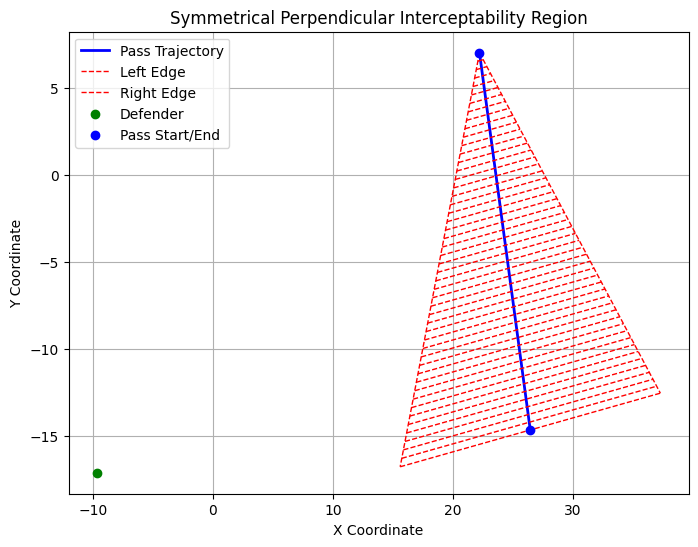

In [49]:
plot_interceptability_triangle(joined_df.iloc[50])